In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [452]:
df=pd.read_csv('c:/Users/Admin/Downloads/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning Data

In [453]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [454]:
df.shape

(891, 12)

In [455]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [457]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [458]:
#handling missing values
df['Age'].std()

14.526497332334044

In [459]:
a=df['Age'].mean()
a

29.69911764705882

In [460]:
def var1(df,var,a):
    df['Age1'] = df['Age'].fillna(a)   
var1(df,'Age',a)

In [461]:
df['Age'].isnull().sum()

177

In [462]:
df['Age1'].isnull().sum()

0

In [463]:
df=df.drop(['Age'],1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [464]:
#Handling with Categorical variables
df['Embarked'].isnull().sum()

2

In [465]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

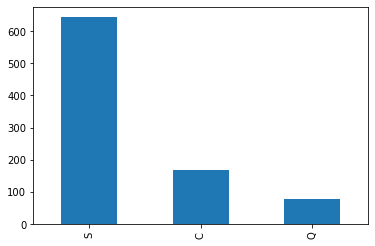

In [466]:
df.Embarked.value_counts().sort_values(ascending=False).plot.bar()

In [467]:
a=df.Embarked.mode()
a

0    S
dtype: object

In [468]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [469]:
df['Cabin'].isnull().sum()

687

In [470]:
def var3(df,var):
    de = df[var].mode()[0]
    df[var].fillna(de,inplace=True)
    
var3(df,'Cabin')

In [471]:
df['Cabin'].isnull().sum()

0

In [472]:
df['Cabin_replace'] = df.Cabin.astype(str).str[0]

In [473]:
df.Cabin_replace.head()

0    B
1    C
2    B
3    C
4    B
Name: Cabin_replace, dtype: object

In [474]:
df = df.drop(['Cabin'],axis=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age1,Cabin_replace
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,B


In [475]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Age1             0
Cabin_replace    0
dtype: int64

# Categorical Variables

In [476]:
dummy_sex = pd.get_dummies(df['Sex'],drop_first=True)

In [477]:
dummy_sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [478]:
Embarked_replace = pd.get_dummies(df['Embarked'],drop_first=True)
Embarked_replace.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [479]:
a = pd.get_dummies(df['Cabin_replace'],drop_first=True)

In [480]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age1,Cabin_replace
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,B


In [481]:
df = pd.concat([df,dummy_sex,dummy_Embarked],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age1,Cabin_replace,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0,B,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,B,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,C,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,B,1,0,1


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Embarked       891 non-null    object 
 10  Age1           891 non-null    float64
 11  Cabin_replace  891 non-null    object 
 12  male           891 non-null    uint8  
 13  Q              891 non-null    uint8  
 14  S              891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 86.3+ KB


In [483]:
df = df.drop(['PassengerId','Name','Sex','Ticket','Cabin_replace','Embarked'],1)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Age1,male,Q,S
0,0,3,1,0,7.2500,22.0,1,0,1
1,1,1,1,0,71.2833,38.0,0,0,0
2,1,3,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,53.1000,35.0,0,0,1
4,0,3,0,0,8.0500,35.0,1,0,1


In [484]:
X = df.drop(['Survived'],1)
y = df['Survived']

In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [486]:
X_train.head()

,Pclass,SibSp,Parch,Fare,Age1,male,Q,S
6,1,0,0,51.8625,54.000000,1,0,1
718,3,0,0,15.5000,29.699118,1,1,0
685,2,1,2,41.5792,25.000000,1,0,0
73,3,1,0,14.4542,26.000000,1,0,0
882,3,0,0,10.5167,22.000000,0,0,1


In [487]:
y_train.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [488]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [489]:
X_train.shape

(596, 8)

In [490]:
!pip install keras

In [491]:
!pip install tensorflow

In [492]:
import keras

In [493]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation,Embedding,Flatten
from keras.activations import relu,sigmoid
from keras.layers import ReLU,LeakyReLU,PReLU,ELU


In [494]:
ann = Sequential()

In [495]:
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=8))
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))



In [496]:
ann.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [497]:
reg = ann.fit(X_train,y_train,validation_split=0.0,batch_size=10,epochs=100)

Epoch 1/100
60/60 [==============================] - 0s 989us/step - loss: 0.7877 - accuracy: 0.3831
Epoch 2/100
60/60 [==============================] - 0s 1ms/step - loss: 0.7338 - accuracy: 0.4391
Epoch 3/100
60/60 [==============================] - 0s 1ms/step - loss: 0.7064 - accuracy: 0.5654
Epoch 4/100
60/60 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.6630
Epoch 5/100
60/60 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6940
Epoch 6/100
60/60 [==============================] - 0s 1ms/step - loss: 0.6433 - accuracy: 0.6733
Epoch 7/100
60/60 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.6948
Epoch 8/100
60/60 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.7081
Epoch 9/100
60/60 [==============================] - 0s 994us/step - loss: 0.6085 - accuracy: 0.7145
Epoch 10/100
60/60 [==============================] - 0s 917us/step - loss: 0.6039 - accuracy: 0.6933
Epo

60/60 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8237
Epoch 83/100
60/60 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8338
Epoch 84/100
60/60 [==============================] - 0s 958us/step - loss: 0.4055 - accuracy: 0.8325
Epoch 85/100
60/60 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8109
Epoch 86/100
60/60 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8255
Epoch 87/100
60/60 [==============================] - 0s 930us/step - loss: 0.4131 - accuracy: 0.8197
Epoch 88/100
60/60 [==============================] - 0s 905us/step - loss: 0.4191 - accuracy: 0.8199
Epoch 89/100
60/60 [==============================] - 0s 813us/step - loss: 0.4501 - accuracy: 0.8069
Epoch 90/100
60/60 [==============================] - 0s 724us/step - loss: 0.4076 - accuracy: 0.8372
Epoch 91/100
60/60 [==============================] - 0s 986us/step - loss: 0.4458 - accuracy: 0.8039
E

In [498]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5

In [499]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [500]:
print(confusion_matrix(y_test,y_pred))


[[155  20]
 [ 44  76]]


In [501]:
accuracy_score(y_test,y_pred)

0.7830508474576271